**MIE1624 ASSIGNMENT1**

**Q1**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/Users/suzhewu/Desktop/MIE1624/Assignment1/clean_kaggle_data.csv')#/content/sample_data/clean_kaggle_data.csv

df = pd.DataFrame(data = dataset,index = None)
salary = df["Q25"]  #extract salary column
age = df['Q1']
gender = df['Q2']
country = df["Q3"]
experience = df['Q6']

new_df = {'salary':salary,'age':age,'gender':gender,'country':country,'experience':experience} #combin and create new dataframe
new_df = pd.DataFrame(data = new_df,index = None)




/Users/suzhewu/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Age VS Salary')

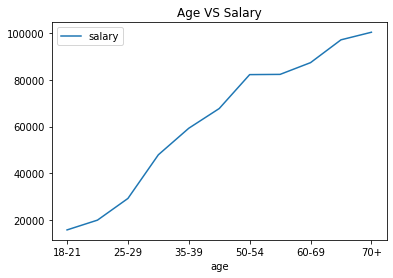

In [3]:
new_df.groupby('age')['salary'].mean().sort_values().plot(legend=True) #categorize the data and show the trend

plt.title('Age VS Salary')


Text(0.5, 1.0, 'Gender VS Salary')

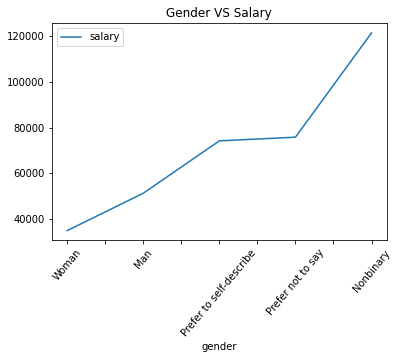

In [4]:
new_df.groupby('gender')['salary'].mean().sort_values().plot(legend=True)
plt.xticks(rotation = 50)


plt.title('Gender VS Salary')

Text(0.5, 1.0, 'salary vs experience')

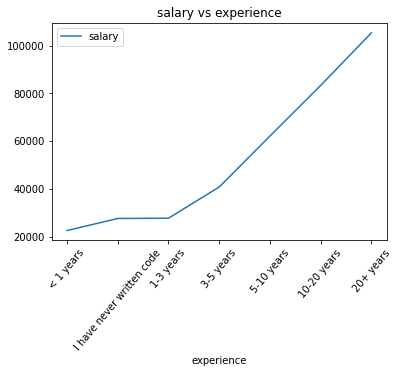

In [5]:
new_df.groupby('experience')['salary'].mean().sort_values().plot(legend=True)

plt.xticks(rotation = 50)
plt.title("salary vs experience")

**Q2**

The Descriptive Report For Man Salary:
               salary
count    12642.000000
mean     51193.600696
std      99979.274378
min       1000.000000
25%       2000.000000
50%      20000.000000
75%      60000.000000
max    1000000.000000


The Descriptive Report For Woman Salary:
               salary
count     2482.000000
mean     34816.881547
std      72017.347888
min       1000.000000
25%       1000.000000
50%       7500.000000
75%      50000.000000
max    1000000.000000


/Users/suzhewu/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


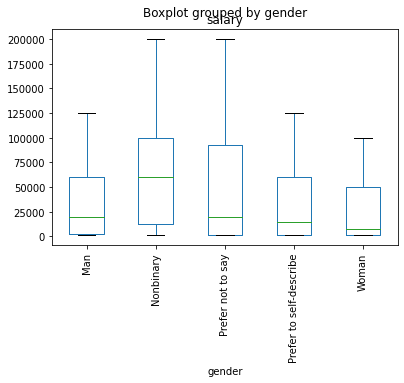

In [6]:
gender_salary_df = {'gender':df['Q2'],'salary':df['Q25']}  #construct new dataFrame

gender_salary_df = pd.DataFrame(data=gender_salary_df)

man_salary_df = gender_salary_df[gender_salary_df['gender'] == 'Man']   #search for man

women_salary_df = gender_salary_df[gender_salary_df['gender'] == 'Woman'] #search for woman

gender_salary_df.boxplot(column='salary',by='gender',grid=False, showfliers=False)
plt.xticks(rotation = 90)
print("The Descriptive Report For Man Salary:")
print(man_salary_df.describe())
# man_salary_df.boxplot(column='salary', by='gender', grid=False, showfliers=False)

print("\n")
print("The Descriptive Report For Woman Salary:")
print(women_salary_df.describe())
# women_salary_df.boxplot(column='salary', by='gender', grid=False, showfliers=False)


In [7]:
from scipy.stats import ttest_ind,bootstrap

group1 = man_salary_df.salary

group2 = women_salary_df.salary

statistic,p_value = ttest_ind(group1,group2)  #perform t-test

print("Test Statistic = "+ str(statistic)+", and the P-value is: "+ str(p_value))

print("Reject Null Hypothesis, Which Means Gender and Salary Are Statistically Significant")





Test Statistic = 7.774059663603156, and the P-value is: 8.088812859676161e-15
Reject Null Hypothesis, Which Means Gender and Salary Are Statistically Significant


Text(0.5, 1.0, 'Bootstrap of Salary Based On Gender')

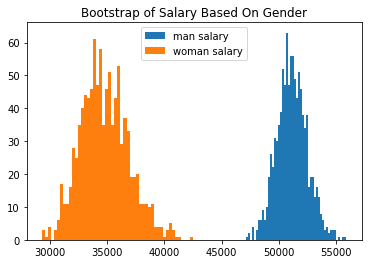

In [8]:
from random import random

# print(man_salary_df)
man_sample = man_salary_df.sample(n = 6000,random_state=2)  #random select the sample

woman_sample = women_salary_df.sample(n = 1200, random_state= 2) #random select the sample
#print(man_sample)
bootstrap = pd.DataFrame({'mean_man_salary':[man_salary_df.sample(n = 6000,replace=True)['salary'].mean() for i in range(0,1000)],'mean_woman_salary':[women_salary_df.sample(n = 1200,replace=True)['salary'].mean() for i in range(0,1000)]})
#bootstrap = pd.DataFrame({'mean_woman_salary':[women_salary_df.sample(n = 500,replace=True)['salary'].mean() for i in range(0,1000)]})
plt.hist(bootstrap['mean_man_salary'],bins=50,label='man salary')
plt.hist(bootstrap['mean_woman_salary'],bins=50,label='woman salary')
plt.legend()
plt.title("Bootstrap of Salary Based On Gender")

Text(0.5, 1.0, 'Distribution Difference In Means')

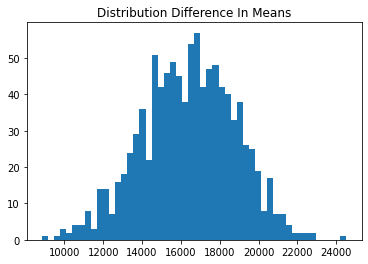

In [9]:
bootstrap['mean_diff'] = bootstrap.mean_man_salary - bootstrap.mean_woman_salary  #mean difference
plt.hist(bootstrap['mean_diff'],bins=50)
plt.title("Distribution Difference In Means")

In [10]:
group3,group4 = bootstrap['mean_man_salary'],bootstrap['mean_woman_salary']   #get the bootstrapped data
ttest_ind(group3,group4)  #perform t-test




Ttest_indResult(statistic=210.21482928454853, pvalue=0.0)

**Question3 ANOVA**

The Descriptive Report For Bachelor's degree Salary:
               salary
count     4777.000000
mean     35578.291815
std      89382.060777
min       1000.000000
25%       1000.000000
50%       7500.000000
75%      40000.000000
max    1000000.000000


The Descriptive Report For Doctoral degree Salary:
               salary
count     2217.000000
mean     70641.181777
std     117160.947589
min       1000.000000
25%       4000.000000
50%      40000.000000
75%      90000.000000
max    1000000.000000


/Users/suzhewu/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


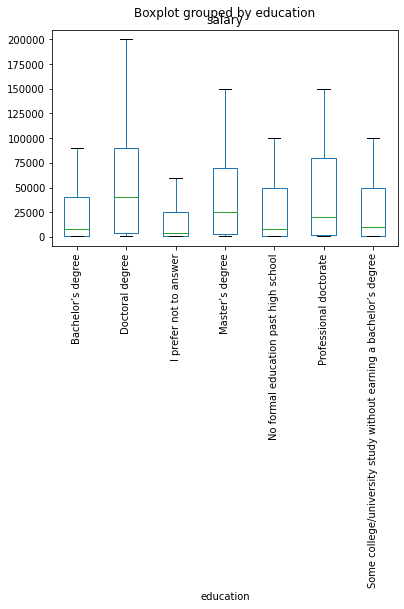

In [11]:
education_salary_df = {'education':df['Q4'],'salary':df['Q25']}  #construct new dataFrame

education_salary_df = pd.DataFrame(data=education_salary_df)

B_salary_df = education_salary_df[education_salary_df['education'] == 'Bachelor’s degree']

M_salary_df = education_salary_df[education_salary_df['education'] == 'Master’s degree']

D_salary_df = education_salary_df[education_salary_df['education'] == 'Doctoral degree']


education_salary_df.boxplot(column='salary',by='education',grid=False,showfliers = False)
plt.xticks(rotation = 90)
print("The Descriptive Report For Bachelor's degree Salary:")
print(B_salary_df.describe())



print('\n')
print("The Descriptive Report For Doctoral degree Salary:")
print(D_salary_df.describe())




In [12]:
print("\n")
print("The Descriptive Report For Master's degree Salary:")
print(M_salary_df.describe())



The Descriptive Report For Master's degree Salary:
               salary
count     6799.000000
mean     52706.868657
std      90928.786678
min       1000.000000
25%       3000.000000
50%      25000.000000
75%      70000.000000
max    1000000.000000


In [13]:
from scipy import stats

B1 = B_salary_df.salary
M1 = M_salary_df.salary
D1 = D_salary_df.salary
stats.f_oneway(B1, M1, D1)   #perform Anova test

F_onewayResult(statistic=109.75776160573479, pvalue=5.107696325253651e-48)

Text(0.5, 1.0, 'Bootstrap of Salary Based On Education Level')

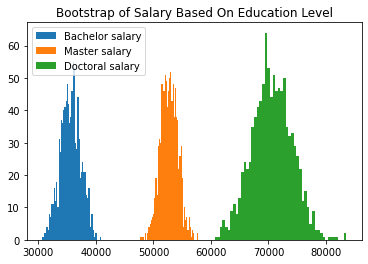

In [14]:
from random import random


B_sample = B_salary_df.sample(n = 2400,random_state=1) #select the data randomly

M_sample = M_salary_df.sample(n = 3400, random_state= 1)

D_sample = D_salary_df.sample(n = 1110, random_state= 1)

new_bootstrap = pd.DataFrame({'B_salary':[B_salary_df.sample(n = 2400,replace=True)['salary'].mean() for i in range(0,1000)],'M_salary':[M_salary_df.sample(n = 3400,replace=True)['salary'].mean() for i in range(0,1000)],'D_salary':[D_salary_df.sample(n = 1110,replace=True)['salary'].mean() for i in range(0,1000)]})
#bootstrap = pd.DataFrame({'mean_woman_salary':[women_salary_df.sample(n = 500,replace=True)['salary'].mean() for i in range(0,1000)]})2400,3400,1110 respectively.    
plt.hist(new_bootstrap['B_salary'],bins=50,label='Bachelor salary')
plt.hist(new_bootstrap['M_salary'],bins=50,label='Master salary')
plt.hist(new_bootstrap['D_salary'],bins=50,label='Doctoral salary')
plt.legend()
plt.title("Bootstrap of Salary Based On Education Level")

Text(0.5, 1.0, 'Distribution Difference In Means Between Doctoral and Master')

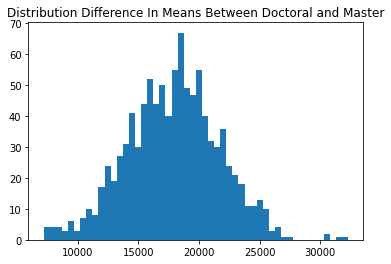

In [15]:
new_bootstrap['DM_mean_diff'] = new_bootstrap.D_salary - new_bootstrap.M_salary   #difference in mean
new_bootstrap['MB_mean_diff'] = new_bootstrap.M_salary - new_bootstrap.B_salary
new_bootstrap['DB_mean_diff'] = new_bootstrap.D_salary - new_bootstrap.B_salary
plt.hist(new_bootstrap['DM_mean_diff'],bins=50,label = 'DM')


plt.title("Distribution Difference In Means Between Doctoral and Master")

Text(0.5, 1.0, 'Distribution Difference In Means Between Master and Bachelor')

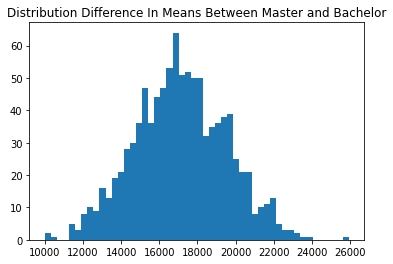

In [16]:
plt.hist(new_bootstrap['MB_mean_diff'],bins=50,label = 'MB')
plt.title("Distribution Difference In Means Between Master and Bachelor")

Text(0.5, 1.0, 'Distribution Difference In Means Between Doctoral and Bachelor')

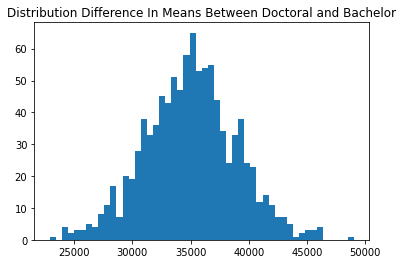

In [17]:
plt.hist(new_bootstrap['DB_mean_diff'],bins=50,label = 'DB')
plt.title("Distribution Difference In Means Between Doctoral and Bachelor")

In [18]:
B2,M2,D2 = new_bootstrap['B_salary'],new_bootstrap['M_salary'],new_bootstrap['D_salary']
stats.f_oneway(B2, M2, D2)  #perform Anova test

F_onewayResult(statistic=51641.34722165487, pvalue=0.0)

In [19]:
%%shell
jupyter nbconvert --to html /content/Assignment1.ipynb   #get html file


UsageError: Cell magic `%%shell` not found.
